# Notebook for testing the SETP-identification algorithms

In [1]:
from classes import *
#in classes, also tipping will be imported!

import matplotlib.pyplot as plt
import os
import pandas as pd
import pickle
import random
import ruptures as rpt

from tqdm.notebook import trange, tqdm
from pathlib import Path

from matplotlib import patches
from matplotlib.collections import PatchCollection

In [2]:
#Load the experiments
input_path = "temp/experiments/experiment_selection_2021_2_19.p"
assert Path(input_path).exists()
experiments = pickle.load( open( input_path, "rb" ) )
print(len(experiments))

1400


The overlap in this list can be easily explained; each unique experiment has 4 Metrics!!!

In [3]:
#SET THE PARAMETERS TO DO THE ANALYSIS
window = 4 #The size of the rolling window
margin = 3 # The margin around the TP

#Criteria
c1 = 0.15 #fraction of change relative to house price at t0
c2 = 1e9 #variance
c3 = 10 #percent

In [4]:
#experiments = experiments[0:100]

with tqdm(total=len(experiments)) as pbar:
    for experiment in experiments:
        experiment.create_Metrics() #TODO: GIVE CONTROL OVER THE METRICS TO BE CREATED
        for M in experiment.allMetrics:
            M.create_statistics(window=window) #Create summary statistics for the metric(t)
            M.find_SETP_candidates(c1=c1,c2=c2,c3=c3,margin=margin)
            M.select_SETPs(sign=-1,add_stable_before=True) #Also consider states which are only stable before as policy relevant
        pbar.update(1)
            #M.plot_both(figsize=(15,20),exp_name=experiment.name)

### Visualisations of individual experiments

In [21]:
#todo: move to tipping.py

def add_suptitle(fig,exp,M):
    """Add some information about the experiment as title to the figure
    
    Arguments:
        fig (Matplotlib Figure) : Figure created with M.plot_SETPs
        exp : experiment object from which to draw the metadata
        metric : the metric from which to draw the metadata
        
    Returns:
        fig (Matplotlib Figure) : the input figure with a suptitle
    
    """
    
    #Make the data of the experiment more readable before sending it to the string
    housing_market = M.name.split('_')[-1]
    if housing_market == 'subj':  housing_market = 'Boundedly rational'
    else: housing_market = 'Rational'
    
    area_name = M.name.split('_')[1]
    if area_name == 'A': area_name = 'A (Heijplaat, outer-dike)'
    else: area_name = 'B (City Centre, inner-dike)'
    
    #Create the title string
    suptitle_string = (\
    '''Sea level rise scenario: {} ||| Storm surge series: {} ||| Mayor: {} ||| IT: {}
    {} housing market ||| Area {}'''.format(
                                   exp.SurgeLevel.corresponding_SLR_Scenario.name.split('_')[-1],
                                   exp.SurgeLevel.corresponding_SurgeHeight.name.split('_')[-1],        
                                   exp.Mayor.get_name(),
                                   str(exp.ImplementationTime).replace(' ',''),
                                   housing_market,
                                   area_name))
    fig.suptitle(suptitle_string)
    
    file_string = exp.SurgeLevel.corresponding_SLR_Scenario.name.split('_')[-1] + '_' +\
                  exp.SurgeLevel.corresponding_SurgeHeight.name.split('_')[-1] + '_' + \
                  exp.Mayor.get_name() + '_' + str(exp.ImplementationTime).replace(' ','') + '_' + \
                  M.name.split('_')[-1] + '_' + M.name.split('_')[1]
    return fig,file_string
    

In [12]:
#CREATE SUBFOLDER IN VISUALISATION WITH CURRENT DATE
today = datetime.date(datetime.now())
date = "{}_{}_{}".format(today.year,today.month,today.day)
target = Path('Visualisations',date,'21_TP_identification')
if not target.exists(): target.mkdir(parents=True)
else: print("Target folder {} already exists".format(target))

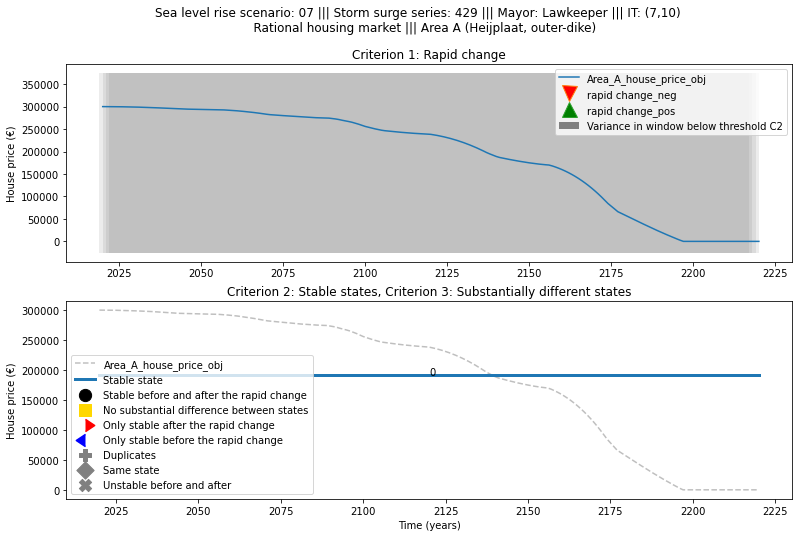

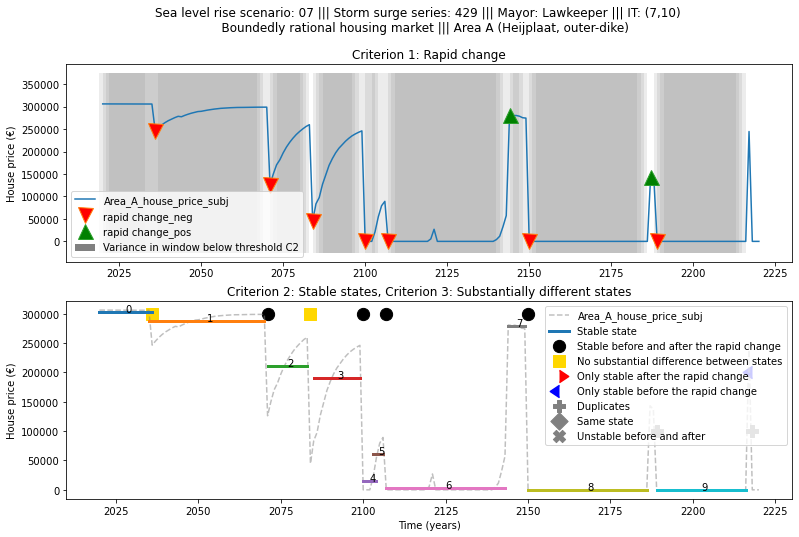

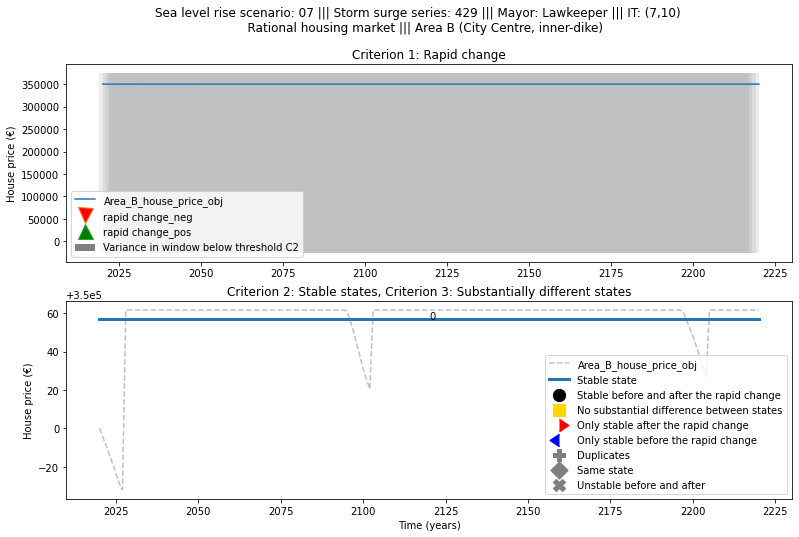

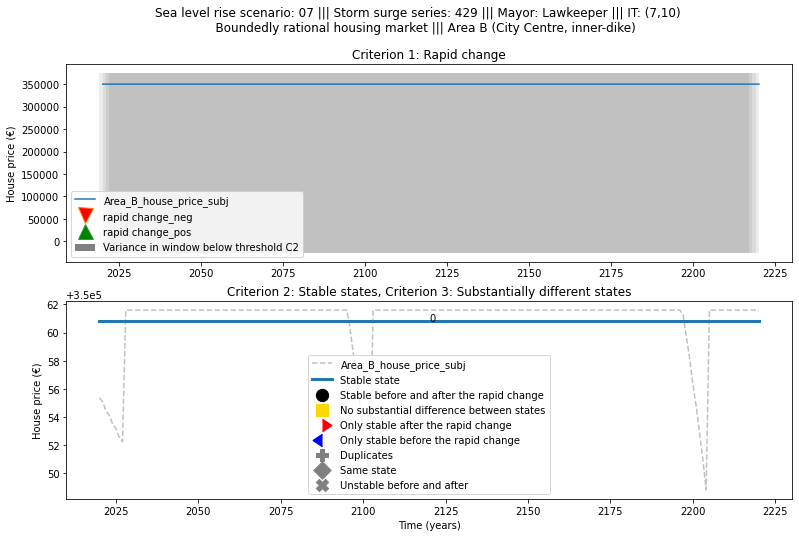

In [22]:
#Todo: show the details of the experiment in addition to the plot
exp = experiments[0]

for M in exp.allMetrics:
    fig, ax = M.plot_SETPs(figsize=(13,8))
    fig, file_string = add_suptitle(fig,exp,M)
    filename = file_string.replace(" ", "")
    #fig.savefig(Path(target, (filename + ".png")),bbox_inches='tight',dpi=150)
    
    del fig, ax

In [35]:
random.shuffle(experiments)
experiments[0:10]

[Rotty_Scenario_05__five_hundred_0_Sentiment_(7, 10) 2021/02/19, 11:20:12,
 Rotty_Scenario_09__five_hundred_2_H. Economicus_(9, 13) 2021/02/19, 11:22:50,
 Rotty_Scenario_02__five_hundred_1_R. Active_(14, 20) 2021/02/19, 11:16:58,
 Rotty_Scenario_09__five_hundred_429_H. Economicus_(7, 10) 2021/02/19, 11:23:23,
 Rotty_Scenario_02__five_hundred_2_R. Active_(14, 20) 2021/02/19, 11:17:12,
 Rotty_Scenario_05__five_hundred_272_H. Economicus_(7, 10) 2021/02/19, 11:20:38,
 Rotty_Scenario_07__five_hundred_0_Lawkeeper_(14, 20) 2021/02/19, 11:21:25,
 Rotty_Scenario_03__five_hundred_451_Sentiment_(4, 6) 2021/02/19, 11:18:59,
 Rotty_Scenario_09__five_hundred_312_Lawkeeper_(14, 20) 2021/02/19, 11:23:14,
 Rotty_Scenario_02__five_hundred_2_Lawkeeper_(7, 10) 2021/02/19, 11:17:16]

In [36]:
for exp in tqdm(experiments[0:10]):
    for M in exp.allMetrics:
        fig, ax = M.plot_SETPs(figsize=(13,8))
        fig, file_string = add_suptitle(fig,exp,M)
        filename = file_string.replace(" ", "")
        fig.savefig(Path(target, (filename + ".png")),bbox_inches='tight',dpi=150)
        plt.close(fig)
        del fig, ax